<a href="https://colab.research.google.com/github/Sushmitha-712/bmi-app/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving housing.csv to housing.csv
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


/tmp/ipython-input-895232457.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)


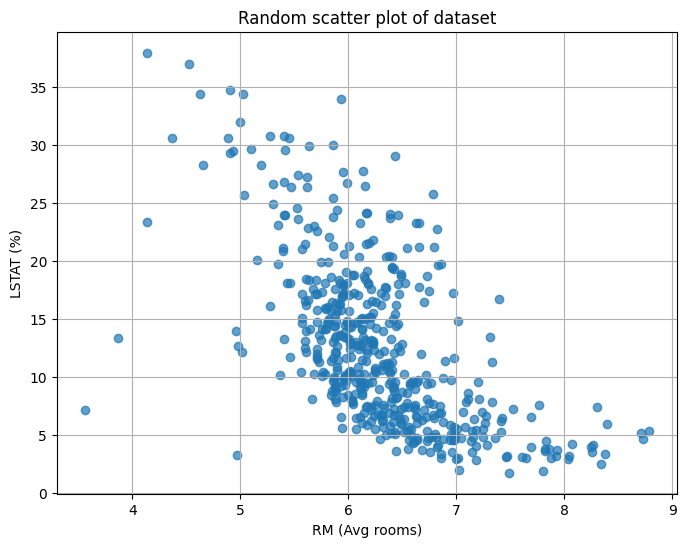

Cluster labels: [0 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 2 2 0 2 2 2
 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 0 2 0 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0
 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 0
 2 2 2 2 2 2 2 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 

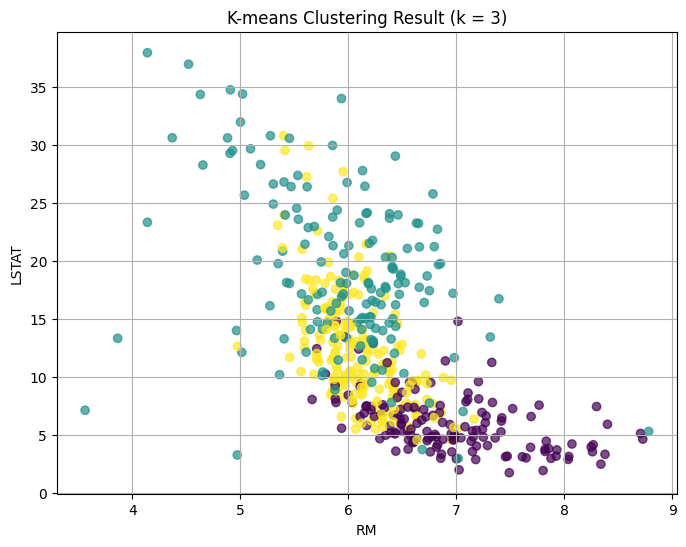

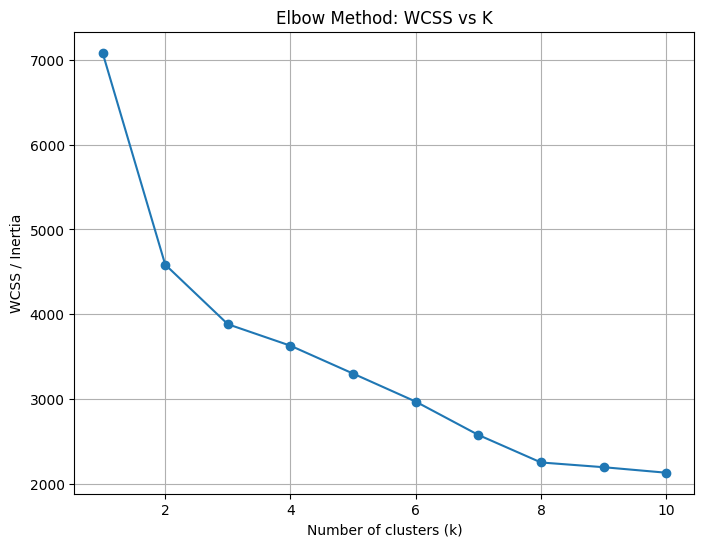

In [1]:
# ========================================================
# 1. IMPORT LIBRARIES
# ========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# For uploading
from google.colab import files

# ========================================================
# 2. UPLOAD & LOAD THE DATASET (space-separated)
# ========================================================
uploaded = files.upload()

df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)

# Add column names of Boston Housing
df.columns = [
    'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
    'RAD','TAX','PTRATIO','B','LSTAT','MEDV'
]

print(df.head())
print(df.shape)
print(df.columns)

# ========================================================
# 3. FEATURE SCALING
# (Clustering works better when data is scaled)
# ========================================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# ========================================================
# 4. RANDOM SCATTER PLOT (using two columns)
# ========================================================
plt.figure(figsize=(8,6))
plt.scatter(df['RM'], df['LSTAT'], alpha=0.7)
plt.xlabel("RM (Avg rooms)")
plt.ylabel("LSTAT (%)")
plt.title("Random scatter plot of dataset")
plt.grid(True)
plt.show()

# ========================================================
# 5. K-MEANS MODEL (choose k = 3 example)
# ========================================================
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_       # cluster labels
centroids = kmeans.cluster_centers_   # scaled centroids
inertia = kmeans.inertia_     # WCSS

print("Cluster labels:", labels)
print("\nCentroids (scaled):\n", centroids)
print("\nWCSS / Inertia:", inertia)

# ========================================================
# 6. SILHOUETTE SCORE
# ========================================================
sil_score = silhouette_score(X_scaled, labels)
print("\nSilhouette Score:", sil_score)

# ========================================================
# 7. PLOT: K-MEANS CLUSTERING RESULT (using RM & LSTAT)
# ========================================================
plt.figure(figsize=(8,6))

plt.scatter(df['RM'], df['LSTAT'], c=labels, cmap='viridis', alpha=0.7)
plt.xlabel("RM")
plt.ylabel("LSTAT")
plt.title("K-means Clustering Result (k = 3)")
plt.grid(True)
plt.show()

# ========================================================
# 8. ELBOW METHOD (WCSS vs K) to find best K
# ========================================================
wcss = []
K_range = range(1, 11)

for i in K_range:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS / Inertia")
plt.title("Elbow Method: WCSS vs K")
plt.grid(True)
plt.show()
